<h1>Анализ результатов опроса по тизеру игры Готика</h1>
<p>Ссылка на результат опубликована в Steam https://steamcommunity.com/app/950670/discussions/0/1742267854809566431. Источник данных https://drive.google.com/drive/folders/1QJYZJsKn3ttbA8g5Lr-15XOHZFHEqu5S</p>
<p>Описательный анализ: знакомство с датасетом</p>

<h2>Подготовка и знакомство с датасетом</h2>
<p>Загрузка пакетов</p>

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter as Counter

Загрузка и просмотр размера таблицы

In [112]:
df = pd.read_csv("../../data/20200219-Gothic-PT_raw-data/Gothic (pt) Survey (Responses)_FINAL.csv", sep = ";", encoding='1251')
# для доступа к файлу данных, разорхивированному в ту же папку использовать следующую строку
# df = pd.read_csv("Gothic (pt) Survey (Responses)_FINAL.csv", sep = ";", encoding='1251')
df.shape

(43114, 23)

Правка настроек вывода таблицы и графиков.

In [113]:
pd.set_option('display.max_column', 23)
pd.set_option('display.max_row', 23)
#sns.set_style('whitegrid') если через seaborn
plt.style.use('seaborn-v0_8-whitegrid')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43114 entries, 0 to 43113
Data columns (total 23 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   Timestamp                                                                                                                              43114 non-null  object 
 1   What is your age?                                                                                                                      43113 non-null  object 
 2   What type of gamer do you consider yourself?                                                                                           43113 non-null  float64
 3   What Gothic games have you played?                                

Проверка вопросов по заголовкам столбцов и наличия пропущенных значений.

In [115]:
df.isna().sum()

Timestamp                                                                                                                                0
What is your age?                                                                                                                        1
What type of gamer do you consider yourself?                                                                                             1
What Gothic games have you played?                                                                                                       1
Which of these other games/game series have you played?                                                                                  1
What are your favorite genres?                                                                                                           1
On which platforms do you play games?                                                                                                    1
How did you play Gothic Pla

<p>Пропущенные значения есть, но их мало. Можно сразу дропнуть, но в примере буду избавляться от них в каждом конкретном случае.</p>

Предпросмотр таблицы


In [116]:
df.head()

,Timestamp,What is your age?,What type of gamer do you consider yourself?,What Gothic games have you played?,Which of these other games/game series have you played?,What are your favorite genres?,On which platforms do you play games?,How did you play Gothic Playable Teaser?,Have you finished Gothic Playable Teaser?,Please rate the visuals in the Gothic Playable Teaser,Please rate the animations in the Gothic Playable Teaser,Please rate the sound in the Gothic Playable Teaser,Please rate the music in the Gothic Playable Teaser,Please rate the controls in the Gothic Playable Teaser,Please rate the combat system in the Gothic Playable Teaser,How did you like the approach to re-interpret the plot?,What do you like to see as next Gothic game?,Would you call yourself a diehard Gothic fan?,What was your favorite Gothic game?,Please rate the English VO in the Gothic Playable Teaser,What overall score would you give the Gothic Playable Teaser?,Based on what you have played in Gothic Playable Teaser: Would you want us to continue the development and release it as a full game?,Please rate the user interface in the Gothic Playable Teaser
0,11 28 2019 13:55:38,36-42,5.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Risen, ArcaniA, Fa...","RPG, Turn basted strategy, RTS",PC,Keyboard/Mouse,Yes,10,8,3,4,3,4,It was spot on!,Gothic Sequel,No,"Gothic, Gothic 2 (with or without Night of the...",4,85,Yes,NaN
1,11 28 2019 14:06:46,36-42,4.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Mount & Blade, Kin...","RPG, MMO, Action/Shooters, Strategy","PC, Consoles",Keyboard/Mouse,Yes,8,9,4,5,3,2,Didnt like it at all,Gothic Sequel,No,Gothic 3,4,80,Yes,NaN
2,12 2 2019 18:18:52,36-42,4.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Kingdom Come, Rise...","RPG, Action Adventure","PC, Consoles",Gamepad,Yes,9,9,4,4,4,4,It was spot on!,Gothic Remake(s),No,Gothic,4,80,Yes,NaN
3,12 10 2019 18:36:41,28-35,5.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Kingdom Come, ELEX...",RPG,"PC, Consoles",Keyboard/Mouse,Yes,5,4,5,5,4,5,It was spot on!,Gothic Remake(s),Yes,Gothic 2 (with or without Night of the Raven),3,80,Yes,5.0
4,12 11 2019 14:41:55,36-42,3.0,"Gothic, Gothic 2 (including Night of the Raven...","The Witcher, Kingdom Come, ELEX, Risen, Fallout","RPG, Action Adventure, Adventure Games","PC, Phones",Keyboard/Mouse,Yes,4,5,5,5,3,2,It was spot on!,Gothic Episodic Spin-Offs,Yes,Gothic 2 (with or without Night of the Raven),3,85,Yes,4.0


Для сравнения и нижнюю часть

In [117]:
df.tail()

,Timestamp,What is your age?,What type of gamer do you consider yourself?,What Gothic games have you played?,Which of these other games/game series have you played?,What are your favorite genres?,On which platforms do you play games?,How did you play Gothic Playable Teaser?,Have you finished Gothic Playable Teaser?,Please rate the visuals in the Gothic Playable Teaser,Please rate the animations in the Gothic Playable Teaser,Please rate the sound in the Gothic Playable Teaser,Please rate the music in the Gothic Playable Teaser,Please rate the controls in the Gothic Playable Teaser,Please rate the combat system in the Gothic Playable Teaser,How did you like the approach to re-interpret the plot?,What do you like to see as next Gothic game?,Would you call yourself a diehard Gothic fan?,What was your favorite Gothic game?,Please rate the English VO in the Gothic Playable Teaser,What overall score would you give the Gothic Playable Teaser?,Based on what you have played in Gothic Playable Teaser: Would you want us to continue the development and release it as a full game?,Please rate the user interface in the Gothic Playable Teaser
43109,2 16 2020 22:26:59,17-21,4.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Risen, ArcaniA, Ba...","RPG, Grand Strategy",PC,Gamepad,Yes,2,3,4,3,4,4,Was ok but could be better,Gothic Prequel,Yes,Gothic 2 (with or without Night of the Raven),3,75,Yes,4.0
43110,2 16 2020 22:29:58,28-35,3.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Mount & Blade, Kin...","RPG, MMO",PC,Keyboard/Mouse,Yes,5,4,5,5,4,5,It was spot on!,Gothic Remake(s),Yes,Gothic 2 (with or without Night of the Raven),3,90,Yes,4.0
43111,2 16 2020 22:48:40,36-42,5.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Risen, Fallout","RPG, Action Adventure",PC,Gamepad,Yes,3,4,5,5,3,5,It was spot on!,Gothic Remake(s),Yes,Gothic 2 (with or without Night of the Raven),1,85,Yes,4.0
43112,2 16 2020 22:49:31,28-35,3.0,Gothic,The Witcher,Action Adventure,Consoles,Gamepad,Yes,4,3,4,4,4,3,Was ok but could be better,Gothic Remake(s),No,Gothic,4,80,Yes,4.0
43113,2 16 2020 22:54:04,17-21,4.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Kingdom Come, ELEX...",RPG,PC,Keyboard/Mouse,No,3,4,4,4,4,4,It was spot on!,Gothic Sequel,Yes,"Gothic, Gothic 2 (with or without Night of the...",4,75,Yes,5.0


На первый взгляд расхождений нет, но Timestamp импортирован как текст, конвертирую в дату.

In [118]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m %d %Y %H:%M:%S')

<h1>Начало анализа</h1>
<p>Как собирались ответы, что за выборка по возрасту, играм, жанрам и платформам.</p>
<p>Пояснений по вариантам ответов "К какому типу игроков вы себя относите?" нет ни в файле с данными, ни в прилагаемой презентации, поэтому игнорирую вопрос и перехожу к остальным вопросам.</p>

In [119]:
print(f"Первый ответ получен {df.Timestamp.min()}, последний - {df.Timestamp.max()}, на все ответы ушло примерно {(df.Timestamp.max() - df.Timestamp.min()).days} дней")

Первый ответ получен 2019-11-28 13:55:38, последний - 2020-02-16 22:54:04, на все ответы ушло примерно 80 дней


Динамика получения ответов

In [120]:
survey_dates = [x.date() for x in df['Timestamp']]
survey_dates = [str(x) for x in survey_dates] #преобразование под счетчик, но нужное ли?
dates_counter = Counter(survey_dates)

C:\Users\Kulikov\AppData\Local\Temp\ipykernel_17800\3944839594.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  dates_plot.set_xticklabels(dates_plot.get_xticklabels(), rotation = 90)


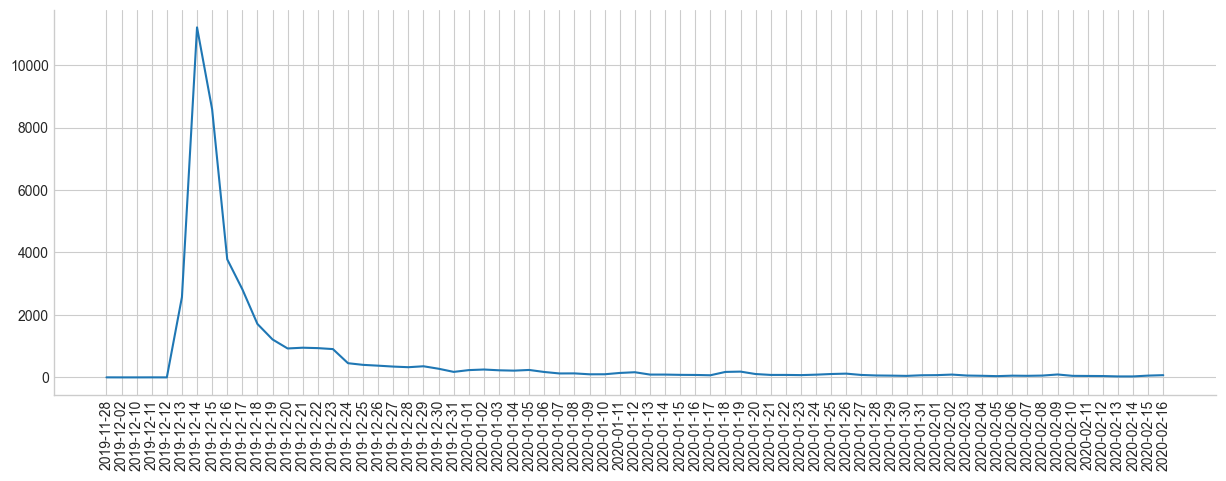

In [121]:
# сначала через pyplot
fig, ax = plt.subplots(figsize=(15, 5))
dates_plot = sns.lineplot(x=dates_counter.keys(), y=dates_counter.values())
dates_plot.set_xticklabels(dates_plot.get_xticklabels(), rotation = 90)
sns.despine()

Единственный пик получения ответов - с 13 по 18 декабря 2019. Дальше суточное количество ответов не превышало 1000, постепенно снижаясь (с небольшими краткими подъемами).

In [122]:
# если буду делать общий график сбора и кумулятивный
answers_df = pd.DataFrame(list(dates_counter.items()))
answers_df.columns = ['date', 'answers']
answers_df['cumulative_ans'] = answers_df['answers'].cumsum()
answers_df

,date,answers,cumulative_ans
0,2019-11-28,2,2
1,2019-12-02,1,3
2,2019-12-10,1,4
3,2019-12-11,2,6
4,2019-12-12,1,7
...,...,...,...
66,2020-02-12,44,42920
67,2020-02-13,32,42952
68,2020-02-14,32,42984
69,2020-02-15,58,43042


Возраст выборки

In [123]:
df['What is your age?'].unique(), df['What is your age?'].value_counts()

(array(['36-42', '28-35', '22-27', '43-50', '17-21', '50-59', '60+',
        'Dec 16', 'Dont want to answer', nan], dtype=object),
 22-27                  16847
 28-35                  13611
 17-21                   7971
 36-42                   2384
 Dec 16                   850
 43-50                    814
 50-59                    329
 60+                      161
 Dont want to answer      146
 Name: What is your age?, dtype: int64)

3 варианта ответов можно убрать из визуализации: "Dont want to answer", "Dec 16", "" - их мало относительно всех респондентов и они не несут значимой информации по возрасту (хотя количество ответов Dec 16 вызывает вопросы).

In [124]:
age_flt  = (df['What is your age?'] != 'Dec 16') & (df['What is your age?'] != 'Dont want to answer')
age_len = len(df['What is your age?'])
age_err = len(df['What is your age?'][age_flt])
print(f"Применение фильтра удалит {age_len - age_err} из {age_len} ответов, т.е. {round(((age_len - age_err) / age_len) * 100, 2)}%")

Применение фильтра удалит 996 из 43114 ответов, т.е. 2.31%


In [125]:
ages = df['What is your age?'].dropna()[age_flt].value_counts(sort=False)
ages.sort_index(ascending=True, inplace=True)
ages

17-21     7971
22-27    16847
28-35    13611
36-42     2384
43-50      814
50-59      329
60+        161
Name: What is your age?, dtype: int64

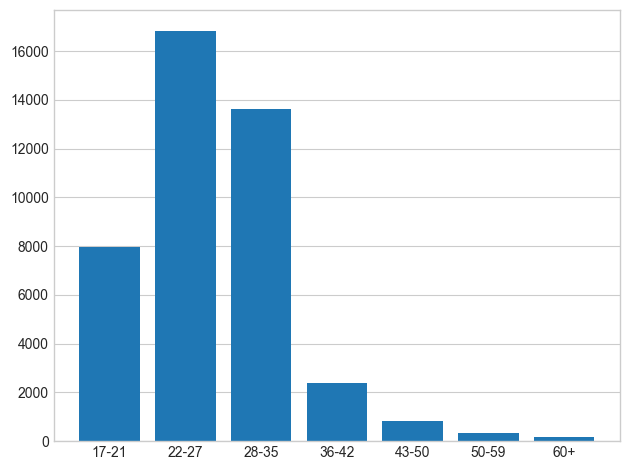

In [126]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.bar(x=ages.index, height=ages)
plt.grid(axis='x')
plt.tight_layout()

In [127]:
games_counter = Counter()
games_series = df['Which of these other games/game series have you played?'].dropna()
for el in games_series.index:
    games_counter.update([i.strip() for i in games_series[el].split(",")])
games_counter.most_common(10)

[('The Witcher', 38992),
 ('Elder Scrolls', 38590),
 ('Risen', 34734),
 ('Fallout', 28382),
 ('ELEX', 23946),
 ('ArcaniA', 22356),
 ('Kingdom Come', 17639),
 ('Mount & Blade', 17258),
 ('For Honor', 13178),
 ('Dark Souls', 561)]

После 'For Honor' идет сильное снижение ниже 600, поэтому для визуализации возьму только те игры, которые упомянули более 600 опрошенными.

In [128]:
# кривовато, оптимизировать?
games = []
games_players = []
[(games.append(x), games_players.append(y)) for x, y in games_counter.most_common(9)]

[(None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None)]

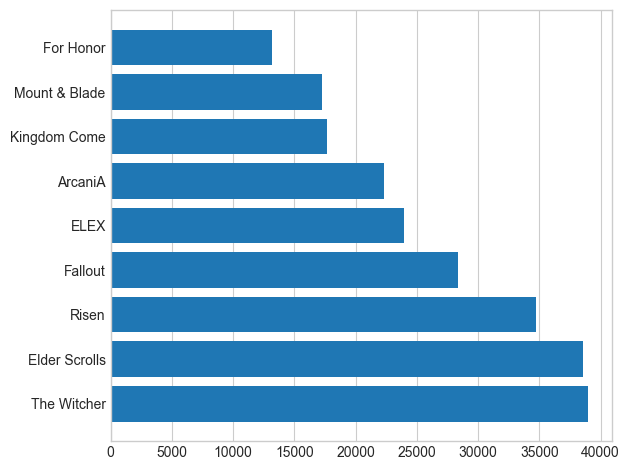

In [129]:

plt.barh(y=games, width=games_players)
plt.grid(axis='y')
plt.tight_layout()

Самые популярные: The Witcher, Elder Scrolls, Risen, Fallout и Elex.

In [130]:
df['What are your favorite genres?'].unique()

array(['RPG, Turn basted strategy, RTS',
       'RPG, MMO, Action/Shooters, Strategy', 'RPG, Action Adventure',
       ..., 'RPG, Action Adventure, Tactic', 'RPG, RTS, 4X, Strategy',
       'RPG, Action Adventure, MMO, 2D Jump&Run'], dtype=object)

In [131]:
df['What are your favorite genres?'][df['What are your favorite genres?'].isna()]

29222    NaN
Name: What are your favorite genres?, dtype: object

Есть одно NaN, это нужно учесть. А т.к. ответ предлагал возможность сочетания нескольких вариантов, снова через счетчик.

In [132]:
genres_counter = Counter()
genres_answers = df['What are your favorite genres?'].dropna()
for el in genres_answers.index:
    genres_counter.update([i.strip() for i in genres_answers[el].split(",")])
genres_counter.most_common(10)

[('RPG', 42011),
 ('Action Adventure', 18890),
 ('Action/Shooters', 12484),
 ('MMO', 10648),
 ('Strategy', 750),
 ('RTS', 549),
 ('MOBA', 189),
 ('strategy', 125),
 ('Strategie', 79),
 ('Racing', 67)]

Также существенное снижение по количеству ответов после стратегий.

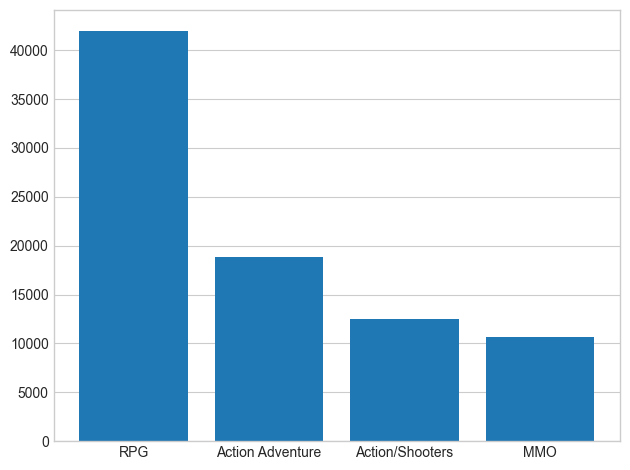

In [133]:
genres = dict(genres_counter.most_common(4))
plt.bar(x=genres.keys(), height=genres.values())
plt.grid(axis='x')
plt.tight_layout()

In [134]:
df['On which platforms do you play games?'].value_counts()

PC                      28888
PC, Consoles             9873
PC, Consoles, Phones     2458
PC, Phones               1464
Consoles                  412
Consoles, Phones           15
Phones                      3
Name: On which platforms do you play games?, dtype: int64

d:\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


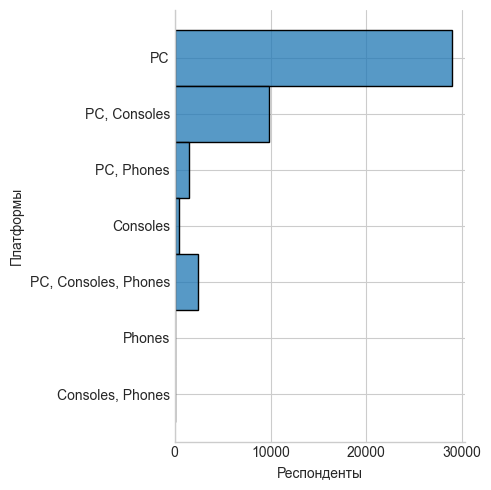

In [135]:
platforms = sns.displot(data=df, y='On which platforms do you play games?')
platforms.set(xlabel='Респонденты', ylabel='Платформы')

<h1>Опыт игры в серию Готика</h1>

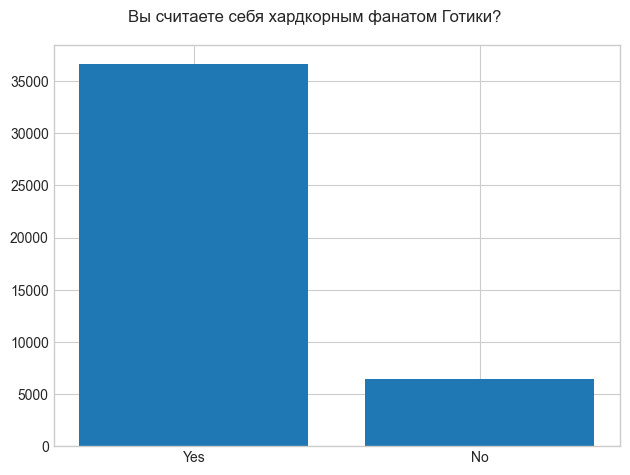

In [136]:
diehard_fan = df['Would you call yourself a diehard Gothic fan?'].value_counts()
plt.bar(diehard_fan.index, diehard_fan.values)
plt.suptitle('Вы считаете себя хардкорным фанатом Готики?')
plt.tight_layout()

В какие части Готики играли опрошенные?

In [137]:
gothic_games_counter = Counter()
dt = df['What Gothic games have you played?'].dropna()

In [138]:
for el in dt.index:
    gothic_games_counter.update([i.strip() for i in dt[el].split(",")])

gothic_games_counter

Counter({'Gothic': 40330,
         'Gothic 2 (including Night of the Raven)': 40588,
         'Gothic 3': 39434})

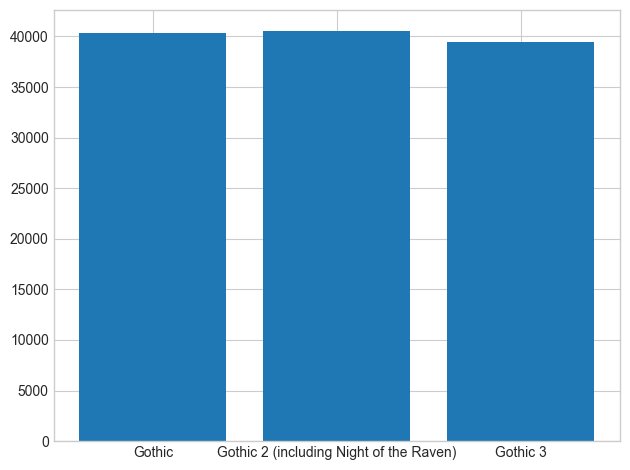

In [139]:
plt.bar(gothic_games_counter.keys(), gothic_games_counter.values())
plt.tight_layout()

Существенных различий нет, но вторую часть (с дополнением "Ночь Ворона") упоминали чуть больше остальных.

In [140]:
df['What was your favorite Gothic game?'].value_counts()

Gothic 2 (with or without Night of the Raven)                      18300
Gothic, Gothic 2 (with or without Night of the Raven)               9221
Gothic                                                              7622
Gothic, Gothic 2 (with or without Night of the Raven), Gothic 3     3565
Gothic 3                                                            3312
Gothic 2 (with or without Night of the Raven), Gothic 3              710
Gothic, Gothic 3                                                     383
Name: What was your favorite Gothic game?, dtype: int64

Также вторая часть оказалась самой предпочитаемой как среди отдельных игр, так и их сочетаний.

<h2>Оценка опыта игры в тизер Готики</h2>
<h3>Визуал</h3>

In [141]:
print(f"Тизер не прошли {round(len(df['Have you finished Gothic Playable Teaser?'][df['Have you finished Gothic Playable Teaser?'] == 'No'])/len(df.index), 2) * 100}% участвовавших в опросе.")

Тизер не прошли 16.0% участвовавших в опросе.


Text(0.5, 0.98, 'Вы прошли тизер?')

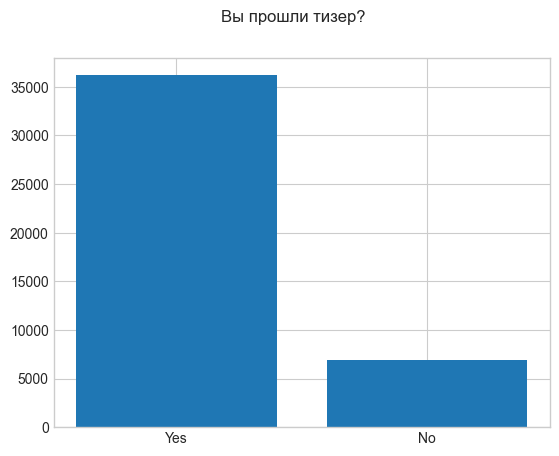

In [142]:
finished = df['Have you finished Gothic Playable Teaser?'].value_counts()
plt.bar(finished.index, finished.values)
plt.suptitle('Вы прошли тизер?')

In [143]:
df['Please rate the visuals in the Gothic Playable Teaser'].value_counts(sort=False)

10        1
8         1
9         1
5      8966
4     19645
3     10434
2      3341
1       725
Name: Please rate the visuals in the Gothic Playable Teaser, dtype: int64

Ответы в 8-10 баллов по 1 респонденту и отсутствие ответов в 6-7 баллов выглядят подозрительно. 

In [144]:
df[df['Please rate the visuals in the Gothic Playable Teaser'] > 5]

,Timestamp,What is your age?,What type of gamer do you consider yourself?,What Gothic games have you played?,Which of these other games/game series have you played?,What are your favorite genres?,On which platforms do you play games?,How did you play Gothic Playable Teaser?,Have you finished Gothic Playable Teaser?,Please rate the visuals in the Gothic Playable Teaser,Please rate the animations in the Gothic Playable Teaser,Please rate the sound in the Gothic Playable Teaser,Please rate the music in the Gothic Playable Teaser,Please rate the controls in the Gothic Playable Teaser,Please rate the combat system in the Gothic Playable Teaser,How did you like the approach to re-interpret the plot?,What do you like to see as next Gothic game?,Would you call yourself a diehard Gothic fan?,What was your favorite Gothic game?,Please rate the English VO in the Gothic Playable Teaser,What overall score would you give the Gothic Playable Teaser?,Based on what you have played in Gothic Playable Teaser: Would you want us to continue the development and release it as a full game?,Please rate the user interface in the Gothic Playable Teaser
0,2019-11-28 13:55:38,36-42,5.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Risen, ArcaniA, Fa...","RPG, Turn basted strategy, RTS",PC,Keyboard/Mouse,Yes,10,8,3,4,3,4,It was spot on!,Gothic Sequel,No,"Gothic, Gothic 2 (with or without Night of the...",4,85,Yes,NaN
1,2019-11-28 14:06:46,36-42,4.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Mount & Blade, Kin...","RPG, MMO, Action/Shooters, Strategy","PC, Consoles",Keyboard/Mouse,Yes,8,9,4,5,3,2,Didnt like it at all,Gothic Sequel,No,Gothic 3,4,80,Yes,NaN
2,2019-12-02 18:18:52,36-42,4.0,"Gothic, Gothic 2 (including Night of the Raven...","Elder Scrolls, The Witcher, Kingdom Come, Rise...","RPG, Action Adventure","PC, Consoles",Gamepad,Yes,9,9,4,4,4,4,It was spot on!,Gothic Remake(s),No,Gothic,4,80,Yes,NaN


<p>Схожая картина по вопросу оценки анимации</p>

In [145]:
df['Please rate the animations in the Gothic Playable Teaser'].value_counts(sort=False)

8        1
9        2
4    16164
5     4813
3    15200
2     5949
1      985
Name: Please rate the animations in the Gothic Playable Teaser, dtype: int64

<p>Аномальные ответы ответы идут первыми 3 строками таблицы, заполненной от даты начала сбора данных. Предположу, что сначала использовалась 10-балльная шкала, а потом ее изменили на 5-балльную, но ответы остались.</p>
<p>Следуя предположению, исключаю ответы первых 3 людей по первым 2 вопросам на оценку</p>

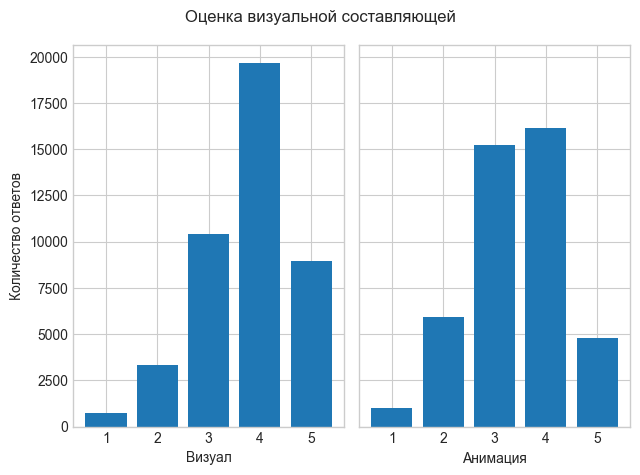

In [146]:
visual = df['Please rate the visuals in the Gothic Playable Teaser'][3:].value_counts()
animation = df['Please rate the animations in the Gothic Playable Teaser'][3:].value_counts()
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.suptitle('Оценка визуальной составляющей')
ax1.bar(x=visual.index, height=visual.values)
ax1.set_ylabel('Количество ответов')
ax1.set_xlabel('Визуал')
ax2.bar(x=animation.index, height=animation.values)
ax2.set_xlabel('Анимация')
f.set_figwidth(6.5)
plt.tight_layout()

In [147]:
print(f"Средняя оценка визуала {round(df['Please rate the visuals in the Gothic Playable Teaser'][3:].mean(), 2)},\nанимации - {round(df['Please rate the animations in the Gothic Playable Teaser'][3:].mean(), 2)}")

Средняя оценка визуала 3.76,
анимации - 3.41


<h3>Аудио</h3>

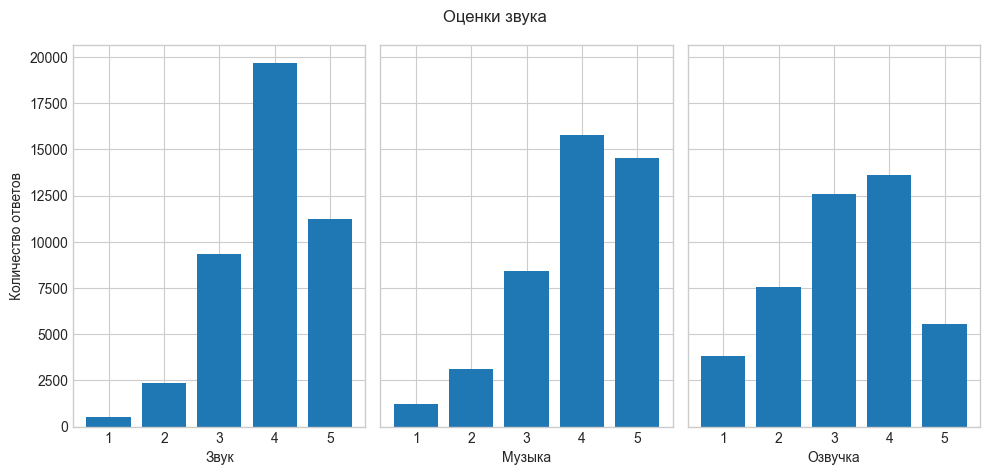

In [148]:
sound = df['Please rate the sound in the Gothic Playable Teaser'].value_counts()
music = df['Please rate the music in the Gothic Playable Teaser'].value_counts()
vas = df['Please rate the English VO in the Gothic Playable Teaser'].value_counts()
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.suptitle('Оценки звука')
ax1.bar(x=sound.index, height=sound.values)
ax1.set_ylabel('Количество ответов')
ax1.set_xlabel('Звук')
ax2.bar(x=music.index, height=music.values)
ax2.set_xlabel('Музыка')
ax3.bar(x=vas.index, height=vas.values)
ax3.set_xlabel('Озвучка')
f.set_figwidth(10)
plt.tight_layout()

<h3>Интерфейс</h3>

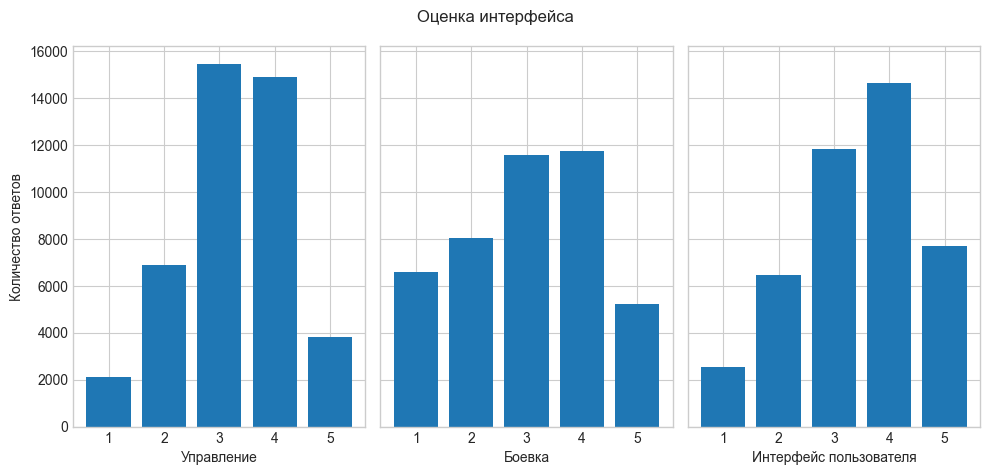

In [149]:
controls = df['Please rate the controls in the Gothic Playable Teaser'].value_counts()
combat_system = df['Please rate the combat system in the Gothic Playable Teaser'].value_counts()
ui = df['Please rate the user interface in the Gothic Playable Teaser'].value_counts()
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.suptitle('Оценка интерфейса')
ax1.bar(x=controls.index, height=controls.values)
ax1.set_xlabel('Управление')
ax1.set_ylabel('Количество ответов')
ax2.bar(x=combat_system.index, height=combat_system.values)
ax2.set_xlabel('Боевка')
ax3.bar(x=ui.index, height=ui.values)
ax3.set_xlabel('Интерфейс пользователя')
f.set_figwidth(10)
plt.tight_layout()

In [150]:
print(f"Средние рейтинги по вопросам:\nУправление - {round(df['Please rate the controls in the Gothic Playable Teaser'].mean(), 2)},\nБоевка - {round(df['Please rate the combat system in the Gothic Playable Teaser'].mean(),2)},\nUI - {round(df['Please rate the user interface in the Gothic Playable Teaser'].mean(),2)}")

Средние рейтинги по вопросам:
Управление - 3.27,
Боевка - 3.02,
UI - 3.43


In [151]:
score_counter = Counter(df['What overall score would you give the Gothic Playable Teaser?'])
score_counter

Counter({'85': 5255,
         '80': 6774,
         '70': 5544,
         '75': 6626,
         '30': 599,
         '90, 90+': 111,
         '90': 2869,
         '90+': 3399,
         '60': 4407,
         '50': 2359,
         '85, 90': 292,
         '80, 85': 403,
         'Below 30': 674,
         '80, 85, 90, 90+': 12,
         '30, 40': 58,
         '40': 1588,
         '60, 70': 463,
         '50, 60': 230,
         '70, 75': 340,
         '80, 85, 90': 48,
         '75, 80': 436,
         '40, 50': 99,
         '70, 80': 19,
         'Below 30, 30, 40': 11,
         '60, 80': 3,
         'Below 30, 30, 90+': 1,
         '85, 90, 90+': 32,
         '40, 50, 60': 18,
         'Below 30, 30': 16,
         '75, 80, 85': 73,
         'Below 30, 70': 5,
         '50, 60, 70': 28,
         '70, 85': 5,
         '70, 75, 80': 83,
         'Below 30, 30, 40, 50, 60, 70, 75, 80, 85, 90, 90+': 8,
         '40, 70, 80': 1,
         '40, 50, 60, 70': 1,
         'Below 30, 85, 90+': 1,
         '

<p>Похоже, что не настроили ограничения ответа - много "грязных" ответов. Вижу 3 варианта работы:</p>
<ul><li>удалить все значения длиной больше 2 символов</li>
<li>заменить 0+ на 1 и повторить удаление всего больше 2 символо</li>
<li>заменить below n на n-1, по ответам с несколькими числовыми значениями рассчитать медиану.</li></ul>
<p>Чтобы дальше сравнить все 3 варианта между собой и выбрать наиболее подходящий, сохраню как 3 разных объекта</p>


In [152]:
scores = df['What overall score would you give the Gothic Playable Teaser?']
print(f"Ответов, в которых больше 2 элементов: {sum(len(i) > 2 for i in scores)}\nИзбавиться от них - удалить {round((sum(len(i) > 2 for i in scores)/len(df))*100, 2)}% из {len(scores)}.")

Ответов, в которых больше 2 элементов: 7093
Избавиться от них - удалить 16.45% из 43114.


In [174]:
scores0 = [int(i) for i in scores if len(i) < 3]
scores0_descr = pd.Series(scores0).describe().round(3)
scores0_descr

count    36021.000
mean        72.061
std         13.732
min         30.000
25%         70.000
50%         75.000
75%         80.000
max         90.000
dtype: float64

In [154]:
scores1 = scores.str.replace('0\+', '1')
print(f"Ответов, в которых осталось больше 2 элементов: {sum(len(i) > 2 for i in scores1)}\nИзбавиться от них - удалить {round((sum(len(i) > 2 for i in scores1)/len(df))*100, 2)}% от {len(scores1)}.")

Ответов, в которых осталось больше 2 элементов: 3694
Избавиться от них - удалить 8.57% от 43114.


C:\Users\Kulikov\AppData\Local\Temp\ipykernel_17800\2092434347.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  scores1 = scores.str.replace('0\+', '1')


In [155]:
scores1 = [int(i) for i in scores1 if len(i) < 3]
scores1_descr = pd.Series(scores1).describe().round(3)
scores1_descr

count    39420.000
mean        73.694
std         14.162
min         30.000
25%         70.000
50%         75.000
75%         85.000
max         91.000
dtype: float64

Что можно сделать дальше: заменю 'Below n' на n-1 ('Below 30' -> 29)

In [156]:
for i in scores[scores.str.match('Below')].unique():
    print(i)

Below 30
Below 30, 30, 40
Below 30, 30, 90+
Below 30, 30
Below 30, 70
Below 30, 30, 40, 50, 60, 70, 75, 80, 85, 90, 90+
Below 30, 85, 90+
Below 30, 30, 40, 50
Below 30, 75
Below 30, 40
Below 30, 85
Below 30, 90+
Below 30, 60
Below 30, 60, 70
Below 30, 50
Below 30, 80
Below 30, 30, 50
Below 30, 40, 50
Below 30, 30, 40, 50, 60, 70, 75, 80, 85
Below 30, 30, 40, 50, 60, 70
Below 30, 30, 40, 50, 60, 70, 75, 80, 85, 90


Паттерн один и без отклонений, поэтому использую простой вариант. Ответ '???? 30' встречается 1 раз и похож на 'Below 30, но за отсутствием подтверждения проще удалить.

In [171]:
scores_tmp = scores[scores != '???? 30']
scores_tmp = scores_tmp.str.replace('0\+', '1')

C:\Users\Kulikov\AppData\Local\Temp\ipykernel_17800\2541144180.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  scores_tmp = scores_tmp.str.replace('0\+', '1')


In [188]:
scores2 = []
for el in scores_tmp:
    if len(el) < 3:
        scores2.append(el)
    elif len(el) == 8 and el.startswith('Below'):
        scores2.append(str(int(el[6:8])-1))
    elif el.startswith('Below'):
        el_split = el.split(', ')
        to_append = str(int(el_split[0][6:8]) - 1)
        for i in el_split[1:]:
            to_append += ', ' + i
        scores2.append(to_append)
    else:
        scores2.append(el)
        
len(scores2)
  

43113

In [189]:
scores2 = [float(x) if len(x) < 3 else np.median([int(i) for i in x.split(', ')]) for x in scores2]
scores2_descr = pd.Series(scores2).describe().round(3)
scores2_descr

count    43113.000
mean        72.897
std         15.056
min         29.000
25%         70.000
50%         75.000
75%         85.000
max         91.000
dtype: float64

Таблица описательных статистик по 3 вариантам данных общей оценки тизера

In [193]:

scores_table = pd.DataFrame({'scores0': scores0_descr.values,
                             'scores1': scores1_descr.values,
                             'scores2': scores2_descr.values}, 
                             index=scores0_descr.index)
scores_table

,scores0,scores1,scores2
count,36021.000,39420.000,43113.000
mean,72.061,73.694,72.897
std,13.732,14.162,15.056
min,30.000,30.000,29.000
25%,70.000,70.000,70.000
50%,75.000,75.000,75.000
75%,80.000,85.000,85.000
max,90.000,91.000,91.000


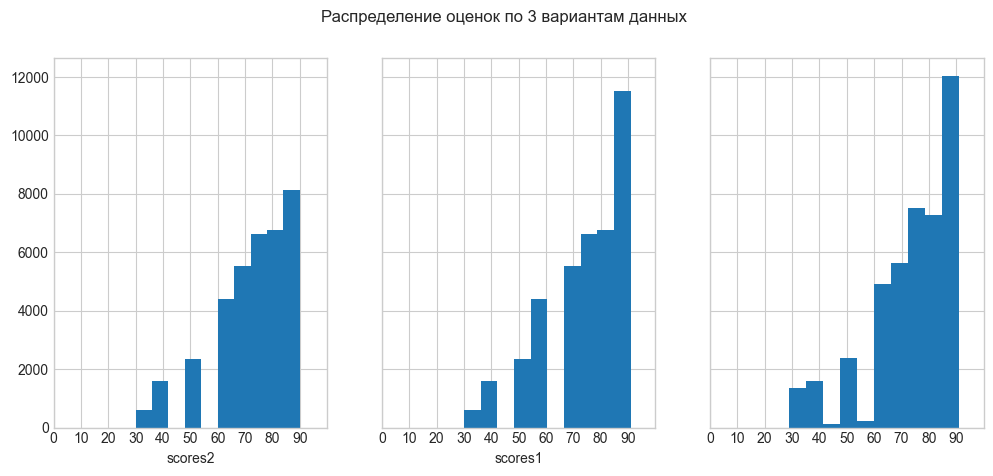

In [222]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.suptitle('Распределение оценок по 3 вариантам данных')
ax1.hist(x=scores0)
ax1.set(xlim=(0, 100), xticks=np.arange(0, 100, 10))
ax1.set_xlabel('scores0')
ax2.hist(x=scores1)
ax2.set(xlim=(0, 100), xticks=np.arange(0, 100, 10))
ax2.set_xlabel('scores1')
ax3.hist(x=scores2)
ax3.set(xlim=(0, 100), xticks=np.arange(0, 100, 10))
ax1.set_xlabel('scores2')
f.set_figwidth(12)

Все 3 варианта показывают схожее распределение, поэтому для анализа выберу 3 вариант с наибольшим объемом данных.

<h3>Мнения</h3>

In [ ]:
df['Based on what you have played in Gothic Playable Teaser: Would you want us to continue the development and release it as a full game?'].value_counts()

Yes    40891
No      2223
Name: Based on what you have played in Gothic Playable Teaser: Would you want us to continue the development and release it as a full game?, dtype: int64

In [ ]:
len(df['What do you like to see as next Gothic game?'].unique())

3779

In [ ]:
df['What do you like to see as next Gothic game?'].value_counts()

Gothic Remake(s)                                                                                                    26012
Gothic Sequel                                                                                                        7573
Gothic Prequel                                                                                                       4989
All of the above                                                                                                       66
all of the above                                                                                                       48
                                                                                                                    ...  
Gothic Remake (s) are fine but i hope if they come there will be a Prequel as well after that.                          1
ALL =)))                                                                                                                1
ALL OF THE ABOVE!       

In [ ]:
df['How did you like the approach to re-interpret the plot?'].value_counts()

Was ok but could be better    25344
It was spot on!               12571
Didnt like it at all           5199
Name: How did you like the approach to re-interpret the plot?, dtype: int64